## Exploratory Data Analysis

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the cleaned data
df = pd.read_csv("../data/processed/cleaned_telco_customer_churn.csv")

print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## High Level KPIs Questions
### 1. What is the overall churn rate of customers?

This metric is crucial for understanding customer retention and business health. A high churn rate may indicate dissatisfaction among customers or competitive pressures in the market.


In [3]:
churn_rate = round(df['Churn'].value_counts(normalize=True)*100, 2)
churn_rate

Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64

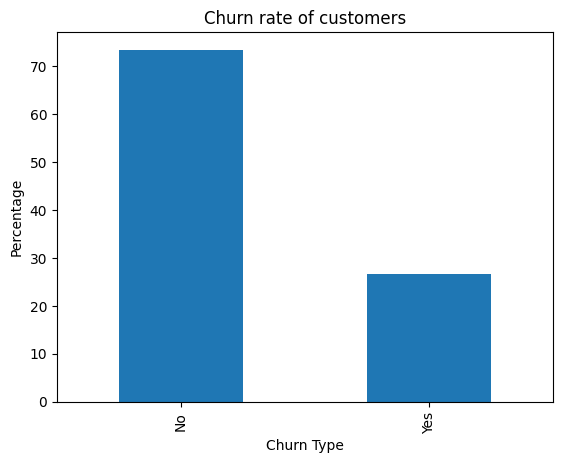

In [4]:
plt.figure()
churn_rate.plot(kind='bar')
plt.xlabel("Churn Type")
plt.ylabel("Percentage")
plt.title("Churn rate of customers")
plt.show()

#### Comment:
Churn rate of customers is approximately 26.5%, indicating that about one in four customers discontinue their service with the company. The churn rate is high. This suggests that the company may need to investigate the reasons behind customer attrition and implement strategies to improve customer retention. 

### 2. How does churn vary by customer tenure (new vs long-term customers)?
We will segment customers based on their tenure into three groups:
* new customers (0-6 months) - high risky as they are still evaluating the service
* mid-term customers (6-24 months) - moderate risk as they have some experience with the service
* long-term customers (24+ months) - low risk as they have established loyalty to the service. 

This type of customer segmentation helps us to identify which customer segments are most at risk of churning and allows for targeted retention strategies.

In [14]:
## Segment customers into three groups
df['tenure'] = df['tenure'].apply(lambda x: 'new' if x<=6 else ('midterm' if x<=24 else 'longterm'))
df['tenure'].sample(10)

4357    longterm
4652    longterm
3911     midterm
1032    longterm
4432     midterm
4624    longterm
4812    longterm
1641    longterm
4248    longterm
1987    longterm
Name: tenure, dtype: object

In [31]:
## See churn rate baseed on tenure
tenure_wise_churn_rate = df.groupby(by='tenure')['Churn'].value_counts(normalize=True).round(2).to_frame()
tenure_wise_churn_rate

proportion
tenure   Churn            
longterm No           0.86
         Yes          0.14
midterm  No           0.68
         Yes          0.32
new      Yes          0.53
         No           0.47

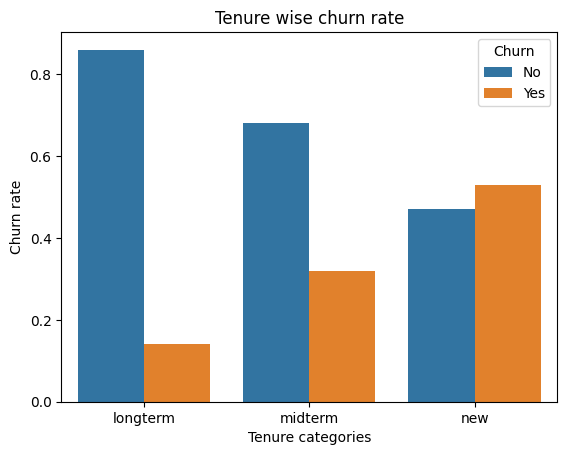

In [68]:
## Visualize it
plt.figure()
sns.barplot(data=tenure_wise_churn_rate, x='tenure', y='proportion', hue='Churn')
plt.title('Tenure wise churn rate')
plt.xlabel('Tenure categories')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
* This analysis revals that new customers (0-6 months) have the highest churn rate at approximately 53%, indicating that they are more likely to discontinue the service shortly after joining. 

* Mid-term customers (6-24 months) have a moderate churn rate of around 32%, while long-term customers (24+ months) exhibit the lowest churn rate at about 14%. 

* This trend suggests that customer loyalty increases with tenure, and efforts to retain new customers could significantly impact overall churn rates.

### 3. What percentage of total revenue is at risk due to churn?
This metric helps quantify the financial impact of customer churn on the business.

In [64]:
## Percentage of total revinue based on churn status
(df.groupby(by='Churn')['TotalCharges'].sum()/df['TotalCharges'].sum()).round(2)*100

Churn
No     82.0
Yes    18.0
Name: TotalCharges, dtype: float64

#### Comment:
So, 18% of total revenue is at risk due to churn. This indicates that a significant portion of the company's revenue could be lost if current churn rates persist.

### 4. How does churn trend differ across monthly vs yearly contracts?
Understanding how contract type influences churn can inform pricing and contract strategies to enhance customer retention.

In [ ]:
contract_wise_churn_rate = df.groupby(by='Contract')['Churn'].value_counts(normalize=True).round(2).to_frame()
contract_wise_churn_rate

proportion
Contract       Churn            
Month-to-month No           0.57
               Yes          0.43
One year       No           0.89
               Yes          0.11
Two year       No           0.97
               Yes          0.03

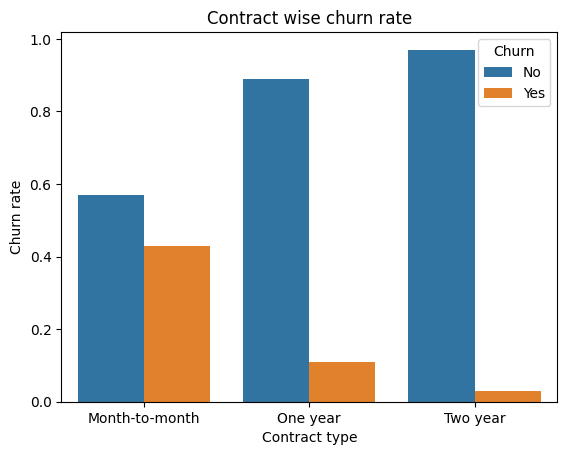

In [70]:
## Visualization
plt.figure()
sns.barplot(data=contract_wise_churn_rate, x='Contract', y='proportion', hue='Churn')
plt.title('Contract wise churn rate')
plt.xlabel('Contract type')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
Customers with month-to-month contracts have a significantly higher churn rate of approximately 43%, compared to those with one-year or two-year contracts. This suggests that longer-term contracts may contribute to greater customer retention.

### 5. Which customer segments contribute most to churn volume?


In [84]:
cusomer_segment_with_churn = pd.pivot_table(data=df, index=['Churn', 'tenure'], columns=['Contract'], aggfunc='size').loc['Yes', :].fillna(0)
cusomer_segment_with_churn

Contract,Month-to-month,One year,Two year
tenure,,,
longterm,352.0,137.0,48.0
midterm,521.0,25.0,0.0
new,779.0,4.0,0.0


In [103]:
cusomer_segment_with_churn_pct = ((cusomer_segment_with_churn/cusomer_segment_with_churn.sum().sum())*100).round(2)
cusomer_segment_with_churn_pct

Contract,Month-to-month,One year,Two year
tenure,,,
longterm,18.86,7.34,2.57
midterm,27.92,1.34,0.00
new,41.75,0.21,0.00


In [122]:
filtered_cusomer_segment_with_churn_pct = cusomer_segment_with_churn_pct.stack()[cusomer_segment_with_churn_pct.stack()>0]
filtered_cusomer_segment_with_churn_pct

tenure    Contract      
longterm  Month-to-month    18.86
          One year           7.34
          Two year           2.57
midterm   Month-to-month    27.92
          One year           1.34
new       Month-to-month    41.75
          One year           0.21
dtype: float64

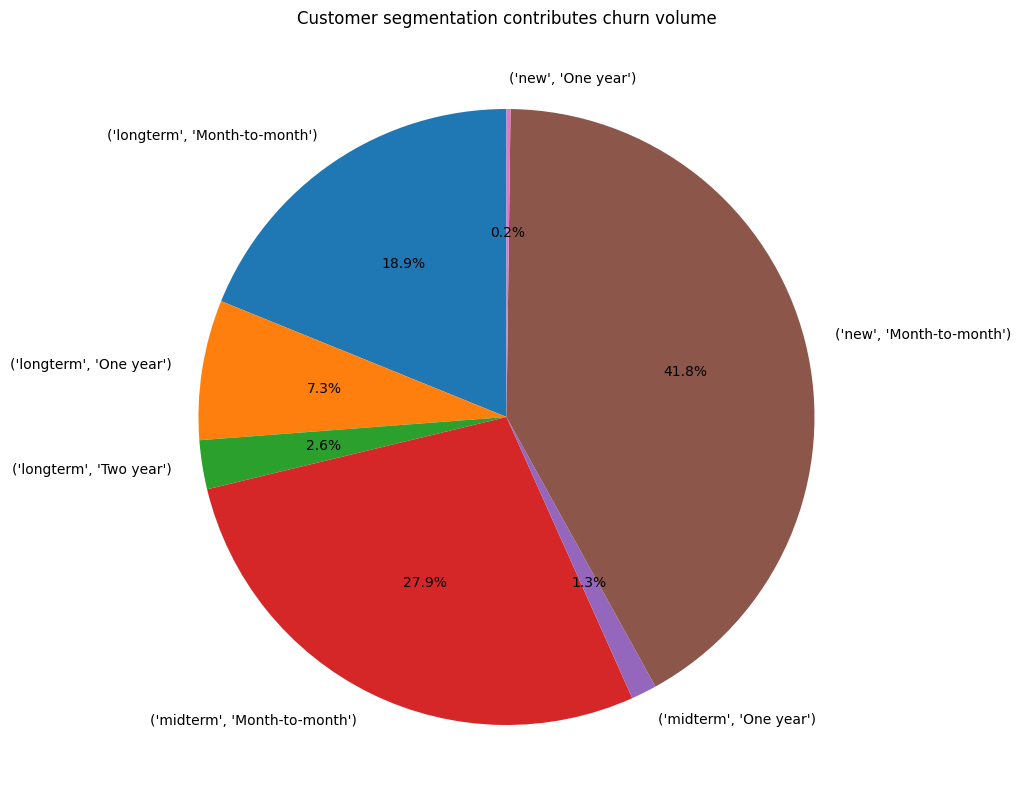

In [126]:
## Pie chart
plt.figure(figsize=(10,10))
x = filtered_cusomer_segment_with_churn_pct.values
labels = filtered_cusomer_segment_with_churn_pct.index
plt.pie(x=x, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Customer segmentation contributes churn volume")
plt.show()

#### Comment:
So, new customers (0-6 months) with month-to-month contracts contribute the most to churn volume, accounting for approximately 41.8% of all churned customers. This indicates that this segment is particularly vulnerable to churn and we should focus more on this group.

## Demographic & Customer Profile Analysis

### 3. How does churn differ for customers with partners or dependents?
Customers with partners or dependents may have different needs and priorities, which can influence their likelihood of churning. Understanding these differences can help tailor retention strategies to specific customer segments.


In [36]:
## Churn rate of customers based on partner
partner_wise_churn_rate = df.groupby(by='Partner')['Churn'].value_counts(normalize=True).round(2).to_frame()
partner_wise_churn_rate

proportion
Partner Churn            
No      No           0.67
        Yes          0.33
Yes     No           0.80
        Yes          0.20

In [ ]:
## Churn rate of customers based on denpendencies
dependent_wise_churn_rate = df.groupby(by='Dependents')['Churn'].value_counts(normalize=True).round(2).to_frame()
dependent_wise_churn_rate

proportion
Dependents Churn            
No         No           0.69
           Yes          0.31
Yes        No           0.84
           Yes          0.16

[]

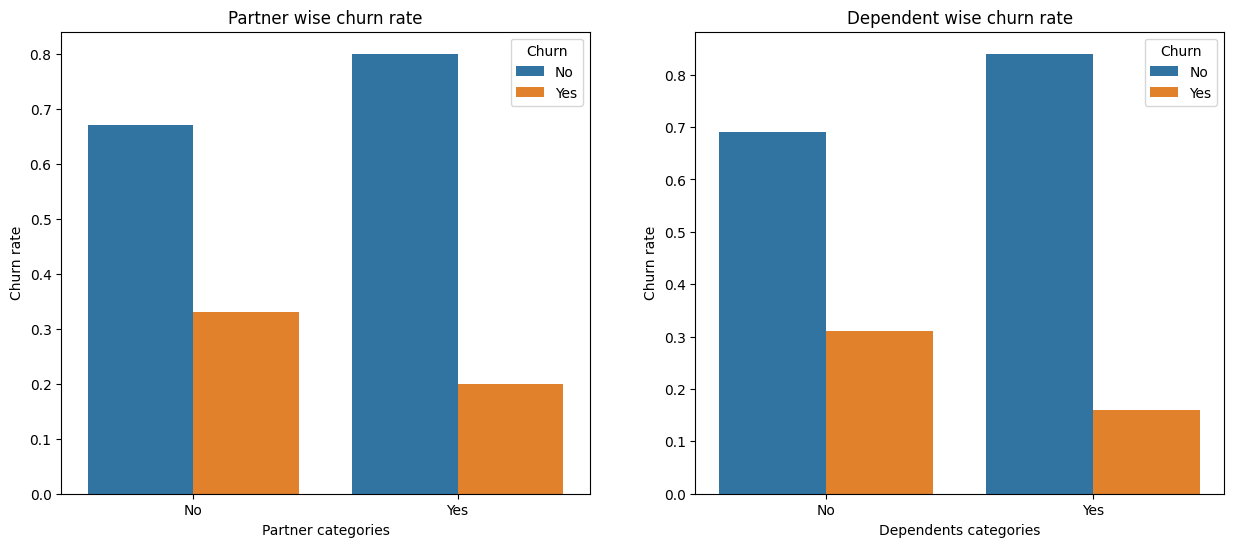

In [43]:
## Visualization
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=partner_wise_churn_rate, x='Partner', y='proportion', hue='Churn')
plt.title('Partner wise churn rate')
plt.xlabel('Partner categories')
plt.ylabel('Churn rate')

plt.subplot(1,2,2)
sns.barplot(data=dependent_wise_churn_rate, x='Dependents', y='proportion', hue='Churn')
plt.title('Dependent wise churn rate')
plt.xlabel('Dependents categories')
plt.ylabel('Churn rate')

plt.plot()

#### Comment:
* This analysis shows that customer without partners  and dependents have a higher churn rate.
* Churn rate for customers without partners is approximately 33%
* Churn rate for customers without dependencis is approximately 31%

### 4. Which demographic group has the highest churn probability?
Understanding churn rates across different demographic groups (gender, SeniorCitizen, Partner, Dependents).

In [57]:
pd.pivot_table(data=df, index=['Churn', 'gender', 'SeniorCitizen'], columns=['Partner', 'Dependents'], aggfunc='size')

Partner                      No       Yes     
Dependents                   No  Yes   No  Yes
Churn gender SeniorCitizen                    
No    Female 0              909  110  482  710
             1              159    2  136   31
      Male   0              962  166  438  713
             1              126    4  176   31
Yes   Female 0              428   32  113  124
             1              158    1   73    8
      Male   0              418   43  128  105
             1              117    1  105   12

#### Comment:
* There are 32 possibe demographic groups based on the combinations.
* Among these groups, the one with the highest churn numbers is (**Gender: Female, SeniorCitizen: No, Partner: No, Dependents: No**) with a churn count of 428.
* So, this demographic group has the highest churn probability compared to other groups.